#Question1
 Write a code that can do the following on a given value of roll number.

Enter your roll number:20103024
[2 0 1 0 3 0 2 4]
after reversing the list of roll number array [4 2 0 3 0 1 0 2]


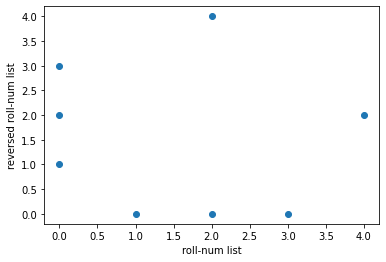

Pearsons correlation: (-0.125, 0.7680549621582029)
slope of regression line
 -0.125 
terception of regression line
 1.6875
Coefficient of determination: -1.25
predicted value of y at x=2.5 is: [1.17647059]
95% confidence interval of predicted value (array([-0.7834934]), array([3.13643457]))
95% confidence interval of mean (-0.45996398454005405, 3.459963984540054)


<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
roll_num=input('Enter your roll number:')
from scipy.stats import pearsonr
from scipy import stats
from sklearn.metrics import r2_score
import statsmodels.api as sm
rollnum = [int(x) for x in str(roll_num)]   #converted rull number input as an integer to list
x = np.asarray(rollnum)      # to make list of roll number
print(x)
y = x[::-1]             # to reverse the list of roll number
print("after reversing the list of roll number array", y)
plt.scatter(x, y, marker='o')
plt.xlabel('roll-num list')
plt.ylabel('reversed roll-num list')
plt.show()
plt.savefig('roll-num plot')      # to save figure 
corr = pearsonr(x, y)    
print('Pearsons correlation:', corr)    # for correlation value
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
print("slope of regression line\n",slope, "\nterception of regression line\n", intercept) # to determine intercept and slope of regression curve
R2 = r2_score(x, y)
print('Coefficient of determination:', R2) 
model = sm.OLS(y, x).fit()
predictions = model.predict(2.5)
print("predicted value of y at x=2.5 is:", predictions)
ci_pred=stats.norm.interval(alpha=0.95, loc=predictions) # to print 95% confidence interval of predicted value of y
print("95% confidence interval of predicted value",ci_pred)
ci_mean=stats.norm.interval(alpha=0.95, loc=np.mean(y))   #to print confidence interval of mean of y
print("95% confidence interval of mean",ci_mean)




#Question2
og is a seasonal phenomenon in North India. It disrupts normal life during winter months. Fog is estimated based on visibility measurements. Given a half-hourly time-series of visibility data, write a program to do the following -

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/1614069210_visibility.csv',encoding = 'unicode_escape')
#To plot time series data
df['visibility'].plot(color='r', label='visibility ')
plt.xlabel('Days')
plt.ylabel('Visibility in km')
plt.legend()
plt.show
df1=df.resample('1M').mean()
print("mean of each months viisbility data is",df1) # for mean of data of each month
df2=df.resample('1M').std()
print("standard deviation  of each months viisbility data is",df2) # for std of data of each month



#Question3
Write a code to compute the discharge for a composite rectangular channel, having different roughness on its bed and the two sides (the roughness of the two sides could also be different from each other). Assume that the equivalent roughness is given by Yen’s formula, i.e., a perimeter-weighted average of the boundary roughness. Use the code to find the discharge in a 0.5 m wide laboratory flume with its bed and one side made of concrete (n=0.015) and the other side made of glass (n=0.009). The bed-slope is 0.0004 and the flow depth is 0.3 m. 

In [ ]:
print('Enter the depth of the channel:')
d = float(input())
print('Enter the Width of the channel: ')
w = float(input())
n_g = 0.009
n_c = 0.015
print('Enter the Bedslope of the channel: ')
S = float(input())
Area = w*d # calculation of area
P1 = d                                     #perimeter of glass sides of channel
P2 = 0.5      # width
P3 = d                             #perimeter of concrete side of channel which is equal to width of channel
Peri = w+(2*d)                           # calculation of Perimeter
ne = ((P1*n_g)+(P2*n_c)+(P3*n_c))/Peri              # equivalent roughness by yen's method
R = Area/Peri             # calculation of HydraulicRadius of channel
Vel = (1/ne)*(R)**(2/3)*(S)**0.5      # calculation of velocity
Q = Area*Vel # calculation of discharge
print("\n Area of the channel is: %.2f" %Area)
print(" Equivalent roughness of the  channel is: %.3f" %ne)
print(" Perimeter of the channel is: %.2f" %Peri)
print(" Hydraulic Radius of the channel is: %.2f" %R)
print(" Velocity of flow is: %.4f" %Vel)
print(" Discharge by channel  is: %.4f" %Q)
# to calculate normal depth
import math
from scipy import optimize
Qn = ((ne*Q) / ((w**2.666)*(S**0.5)))**0.6 #Non dimensional discharge Qn
#evaluation of non dimensional parameter consisting normal depth
def f(eta):
  return  eta - Qn*((1+2*eta)**0.4)
   
eta = optimize.newton(f,Qn) # Using Newton Rapson method
yn= eta*w
print('The normal depth is %0.4f'%yn)

Enter the depth of the channel:
0.3
Enter the Width of the channel: 
0.5
Enter the Bedslope of the channel: 
0.0004

 Area of the channel is: 0.15
 Equivalent roughness of the  channel is: 0.013
 Perimeter of the channel is: 1.10
 Hydraulic Radius of the channel is: 0.14
 Velocity of flow is: 0.3965
 Discharge by channel  is: 0.0595
The normal depth is 0.2999


In [ ]:
import math
from scipy import optimize
w = float(input('Enter the Width of a channel: '))
S = float(input('Enter the Bedslope of a channel: '))
n = float(input('Enter the equivalent surfaceroughness of the channel: '))
Q = float(input("Enter the discharge of the channel ")) 
Qn = ((ne*Q) / ((w*2.666)*(S*0.5)))**0.6 #Non dimensional form of discharge Qn
#evaluation of non dimensional parameter containing normal depth
def f(eta):
  return  eta - Qn*((1+2*eta)**0.4)
   
eta = optimize.newton(f,Qn) # Using Newton Rapson method
yn= eta*w
print(yn)

Enter the Width of a channel: 0.5
Enter the Bedslope of a channel: 0.0004
Enter the equivalent surfaceroughness of the channel: 0.01
Enter the discharge of the channel 0.1
3.649047804175305


In [ ]:
from scipy import optimize
print("enter the discharghe value at which u want to know normal depth")
q = float(input())
def f(y):
  return ((0.5*y)*(1/(0.01)*(((0.5*y)/(0.5+2*y))**(0.667)*(0.0004)**(0.5))-0.1
  root = optimize.newton(f, 0.1)
  return root
print("Normal depth is:", root)

SyntaxError: ignored